# Ultimate Data Challenge

Import important libraries 

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime as dt , timedelta

In [2]:
f = open ('logins.json', "r")

In [3]:
data = json.loads(f.read())

In [4]:
timestamp = pd.DataFrame(data)

In [5]:
timestamp.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
timestamp['transaction_count'] = 1

In [7]:
timestamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   login_time         93142 non-null  object
 1   transaction_count  93142 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [8]:
timestamp['date'] = pd.to_datetime(timestamp['login_time'])

In [9]:
maximum = timestamp['date'].max()

In [10]:
print(maximum)

1970-04-13 18:57:38


In [11]:
minimum = timestamp['date'].min()

In [12]:
print(minimum)

1970-01-01 20:12:16


In [13]:
timestamp = timestamp.sort_values('date')

In [14]:
timestamp = timestamp.drop( 'login_time', axis = 1)

In [15]:
timestamp.head(5)

,transaction_count,date
6,1,1970-01-01 20:12:16
0,1,1970-01-01 20:13:18
1,1,1970-01-01 20:16:10
3,1,1970-01-01 20:16:36
2,1,1970-01-01 20:16:37


In [16]:
timestamp.set_index('date' , inplace = True)

In [17]:
timestamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:12:16 to 1970-04-13 18:57:38
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   transaction_count  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [18]:
timestamp['1970-01-01'].head(10)

/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,transaction_count
date,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


In [19]:
reference_start = '1970-01-01 20:00:00'

In [20]:
reference_end = '1970-04-13 19:00:00'

In [21]:
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

In [22]:
df = timestamp.groupby(timestamp.index.floor('15Min')).count()

In [23]:
df.head()

,transaction_count
date,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<AxesSubplot:xlabel='date'>

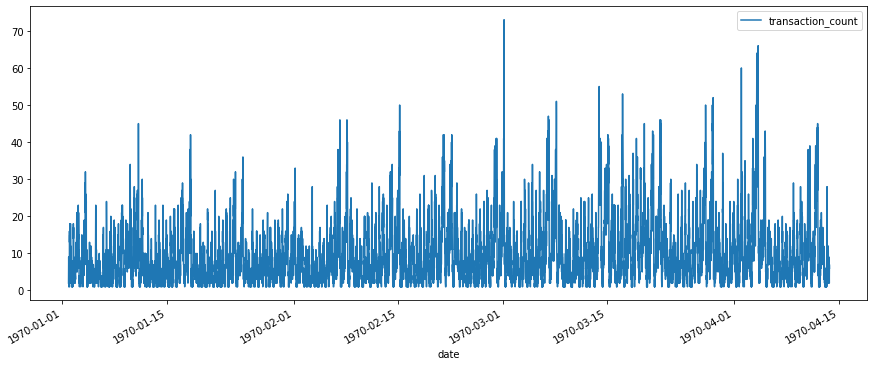

In [24]:
df.plot(figsize =(15,6))

In [25]:
df['time_hour'] = df.index.hour

In [26]:
df.head()

,transaction_count,time_hour
date,,
1970-01-01 20:00:00,2,20
1970-01-01 20:15:00,6,20
1970-01-01 20:30:00,9,20
1970-01-01 20:45:00,7,20
1970-01-01 21:00:00,1,21


In [27]:
df['period'] = (df['time_hour'] % 24 + 4) // 4
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [28]:
df.head()

,transaction_count,time_hour,period
date,,,
1970-01-01 20:00:00,2,20,Night
1970-01-01 20:15:00,6,20,Night
1970-01-01 20:30:00,9,20,Night
1970-01-01 20:45:00,7,20,Night
1970-01-01 21:00:00,1,21,Night


In [31]:
df.groupby('period')['transaction_count'].agg([np.sum , np.mean ])

,sum,mean
period,,
Early Morning,9932,7.114613
Evening,11631,7.301318
Late Night,22941,14.143650
Morning,11208,7.378539
Night,22391,13.753686
Noon,15039,9.266174


Text(0.5, 0, 'Transaction Count')

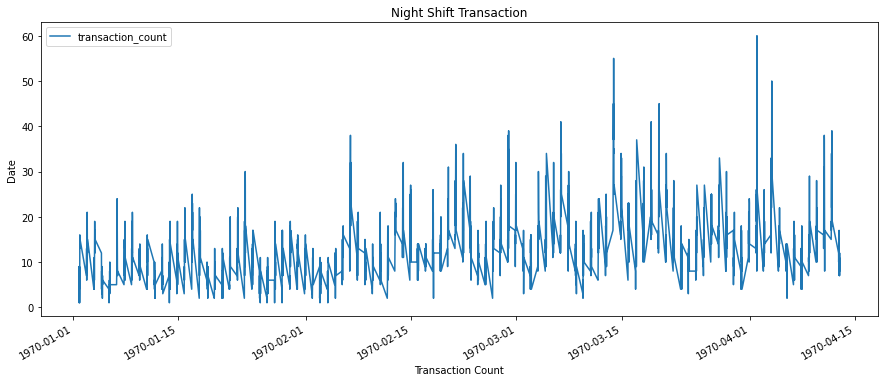

In [40]:
df[df['period'] ==  'Night'].plot(y = 'transaction_count' , figsize = (15,6))
plt.title('Night Shift Transaction')
plt.ylabel('Date')
plt.xlabel("Transaction Count")


Text(0, 0.5, 'Transaction Count')

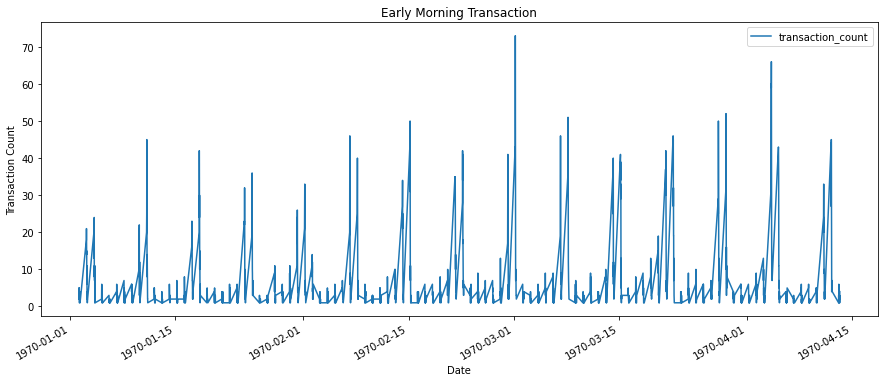

In [45]:
df[df['period'] ==  'Early Morning'].plot(y = 'transaction_count' , figsize = (15,6))
plt.title('Early Morning Transaction')
plt.xlabel('Date')
plt.ylabel("Transaction Count")



Text(0.5, 0, 'Date')

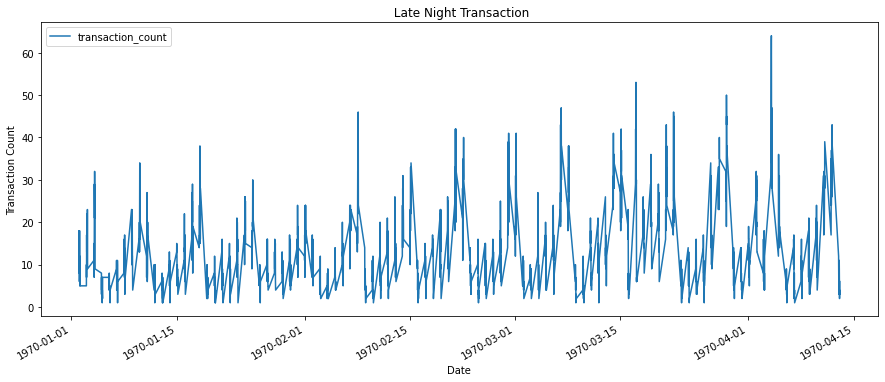

In [46]:
df[df['period'] ==  'Late Night'].plot(y = 'transaction_count' , figsize = (15,6))
plt.title(' Late Night Transaction')
plt.ylabel('Transaction Count')
plt.xlabel("Date")

<AxesSubplot:xlabel='date'>

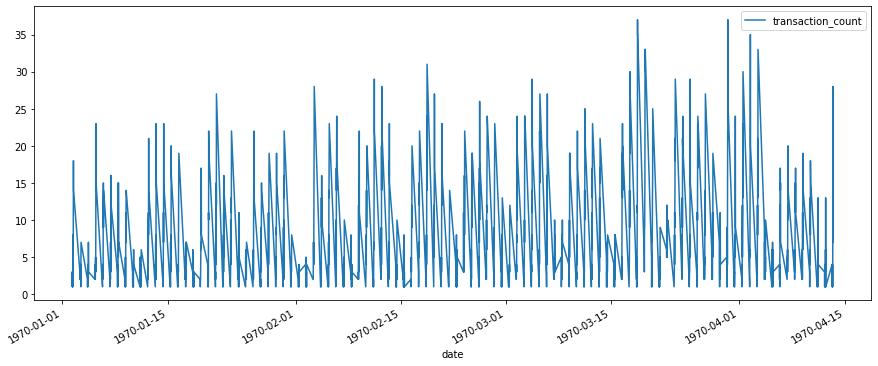

In [34]:
df[df['period'] ==  'Morning'].plot(y = 'transaction_count' , figsize = (15,6))
plt.title(' Late Night Transaction')
plt.ylabel('Date')
plt.xlabel("Transaction Count")

Text(0.5, 0, 'Transaction Count')

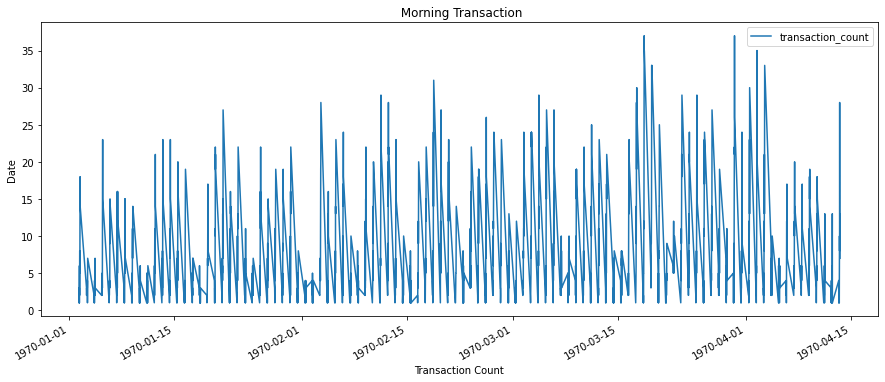

In [47]:
df[df['period'] ==  'Morning'].plot(y = 'transaction_count' , figsize = (15,6))
plt.title(' Morning Transaction')
plt.ylabel('Date')
plt.xlabel("Transaction Count")

Resample data on daily basis

In [52]:
df_daiy = df.resample('D').sum()

In [53]:
df_daiy.head()

,transaction_count,time_hour
date,,
1970-01-01,112,323
1970-01-02,681,1076
1970-01-03,793,1076
1970-01-04,788,1097
1970-01-05,459,1064


In [55]:
df_daily = df_daiy.drop(columns = 'time_hour', axis = 1)

In [56]:
df_daily.head()

,transaction_count
date,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


<AxesSubplot:xlabel='date'>

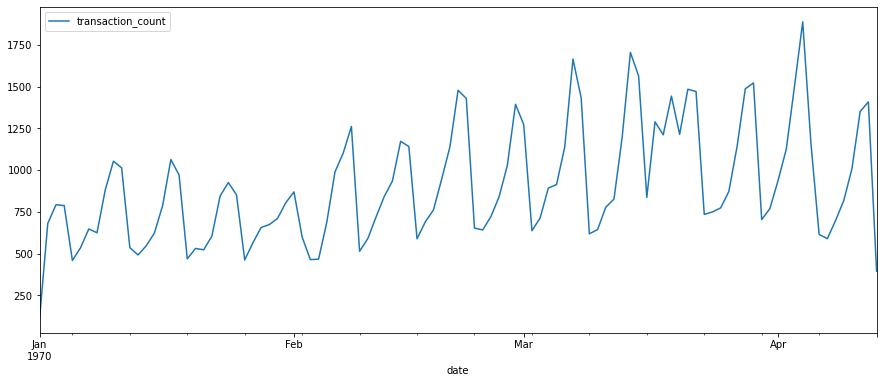

In [57]:
df_daily.plot(figsize= (15,6))

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [59]:
result_add = seasonal_decompose(df_daily['transaction_count'], model='additive', extrapolate_trend='freq')

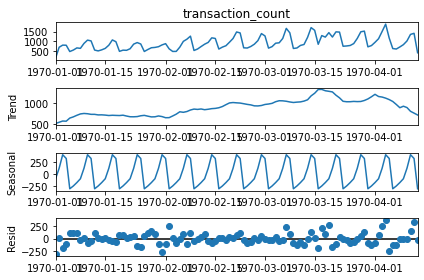

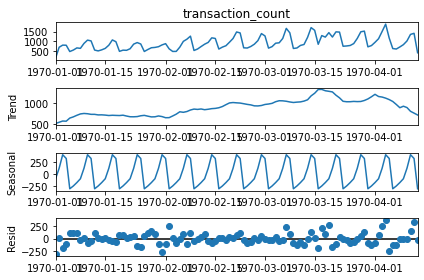

In [69]:
result_add.plot()

In [65]:
seasonal = result_add.seasonal

<AxesSubplot:xlabel='date'>

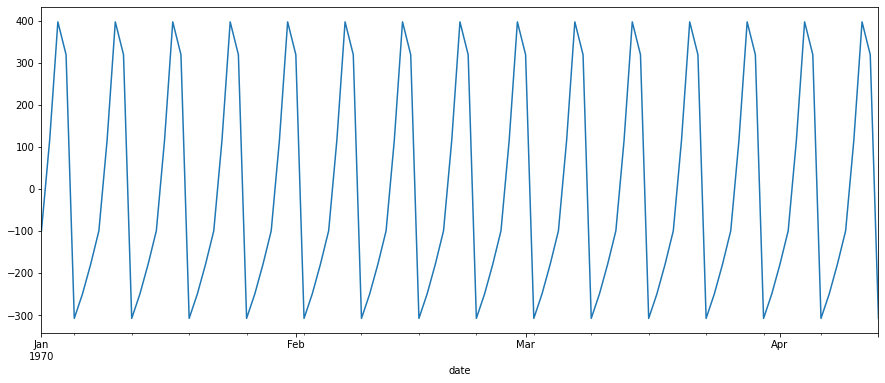

In [68]:
seasonal.plot(figsize = (15,6))

The transacation data shows a weekly seasonality 